In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
SR1_ds = xr.open_mfdataset('./MOZART_data/MOZARTGFDLV2_SR1/renamed/htap.MOZART*.nc', combine = 'by_coords')
SR1_ds2 = xr.open_mfdataset('./MOZART_data/MOZARTGFDLV2_SR1/renamed/MOZART*.nc', combine = 'by_coords')
SR1_ds['time'] = SR1_ds2['time']
SR1_ds = SR1_ds.merge(SR1_ds2)

In [3]:
def import_SR6(path1,path2):
    SR6_ds = xr.open_mfdataset(path1, combine = 'by_coords')
    SR6_ds2 = xr.open_mfdataset(path2, combine = 'by_coords')
    SR6_ds['time'] = SR6_ds2['time']
    SR6_ds = SR6_ds.rename({'x':'lon','y':'lat'})
    SR6_ds2 = SR6_ds2.assign_coords(lon=(((SR6_ds2.lon + 180) % 360) - 180))
    SR6_ds2 = SR6_ds2.sortby('lon')
    SR6_ds = SR6_ds.merge(SR6_ds2)
    return(SR6_ds)
def import_SR1(path1,path2):
    SR6_ds = xr.open_mfdataset(path1, combine = 'by_coords')
    SR6_ds2 = xr.open_mfdataset(path2, combine = 'by_coords')
    SR6_ds['time'] = SR6_ds2['time']
    SR6_ds2 = SR6_ds2.assign_coords(lon=(((SR6_ds2.lon + 180) % 360) - 180))
    SR6_ds2 = SR6_ds2.sortby('lon')
    SR6_ds = SR6_ds.merge(SR6_ds2)
    return(SR6_ds)

In [4]:
SR6EU_ds = import_SR6('./MOZART_data/MOZARTGFDLV2_SR6EU/renamed/htap.MOZART*.nc','./MOZART_data/MOZARTGFDLV2_SR6EU/renamed/MOZART*.nc')
SR6NA_ds = import_SR6('./MOZART_data/MOZARTGFDLV2_SR6NA/renamed/htap.MOZART*.nc','./MOZART_data/MOZARTGFDLV2_SR6NA/renamed/MOZARTGFDLV2_SR6NA_*.nc')
SR6SA_ds = import_SR6('./MOZART_data/MOZARTGFDLV2_SR6SA/renamed/htap.MOZART*.nc','./MOZART_data/MOZARTGFDLV2_SR6SA/renamed/MOZARTGFDLV2_SR6SA_*.nc')
SR6EA_ds = import_SR6('./MOZART_data/MOZARTGFDLV2_SR6EA/renamed/htap.MOZART*.nc','./MOZART_data/MOZARTGFDLV2_SR6EA/renamed/MOZARTGFDLV2_SR6EA_*.nc')
SR1_ds = import_SR1('./MOZART_data/MOZARTGFDLV2_SR1/renamed/htap.MOZART*.nc','./MOZART_data/MOZARTGFDLV2_SR1/renamed/MOZART*.nc')


In [5]:
kg_to_ug = 1e9
s_to_month = 2.628e6

In [21]:

def calc_f(ds_0, ds_1, emis_species_0, emis_species_1):
    f = (
            (ds_1[emis_species_1]).weighted(ds_1['area']).mean(dim = ['lat','lon'])-
            (ds_0[emis_species_0]).weighted(ds_0['area']).mean(dim = ['lat','lon'])
        )
    return(f)
def calc_δc_δt(ds_0, ds_1, conc_species_0, conc_species_1):
    δc_δt = (
        ds_1[conc_species_1].weighted(ds_1['area']).mean(dim = ['lat','lon'])-
        ds_0[conc_species_0].weighted(ds_0['area']).mean(dim = ['lat','lon'])
        ).diff('time')/s_to_month
    return(δc_δt)
def calc_G(ds_0, ds_1, emis_species_0, emis_species_1, conc_species_0, conc_species_1):
    G = calc_δc_δt(ds_0, ds_1, conc_species_0, conc_species_1)/calc_f(ds_0, ds_1, emis_species_0, emis_species_1)
    return(G)

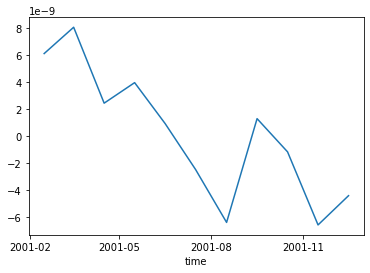

In [38]:
calc_δc_δt(SR1_ds, SR6EU_ds, 'sconc_bc', 'sconc_bcsr6eu').plot()

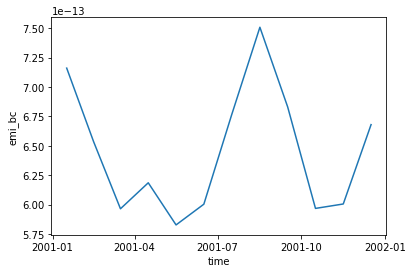

In [41]:
SR1_ds['emi_bc'].weighted(SR1_ds['area']).mean(dim = ['lat','lon']).plot()

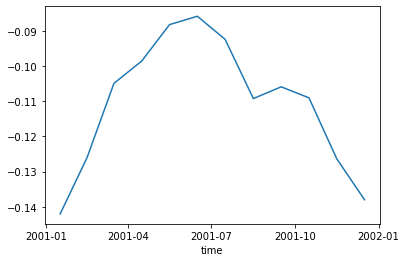

In [37]:
(SR6EU_ds['sconc_bcsr6eu'].weighted(SR6EU_ds['area']).mean(dim = ['lat','lon'])-SR1_ds['sconc_bc'].weighted(SR1_ds['area']).mean(dim = ['lat','lon'])).plot()

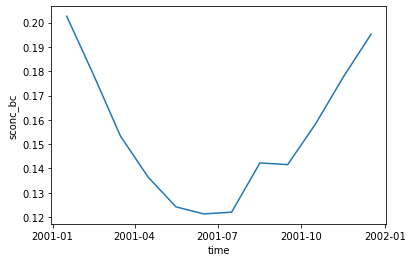

In [27]:
SR1_ds['sconc_bc'].weighted(SR1_ds['area']).mean(dim = ['lat','lon']).plot()

In [ ]:
calc_δc_δt(SR1_ds, SR6EU_ds,)

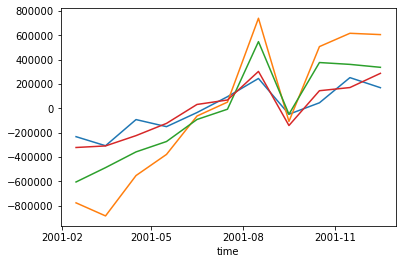

In [22]:
calc_G(SR1_ds, SR6EU_ds, 'emi_bc', 'emi_bc','sconc_bc','sconc_bcsr6eu').plot()
calc_G(SR1_ds, SR6NA_ds, 'emi_bc', 'emi_bc','sconc_bc','sconc_bcsr6na').plot()
calc_G(SR1_ds, SR6SA_ds, 'emi_bc', 'emi_bc','sconc_bc','sconc_bcsr6sa').plot()
calc_G(SR1_ds, SR6EA_ds, 'emi_bc', 'emi_bc','sconc_bc','sconc_bcsr6ea').plot()

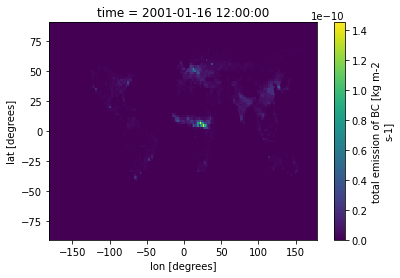

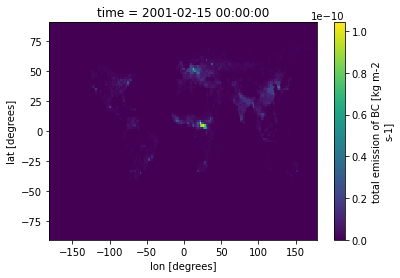

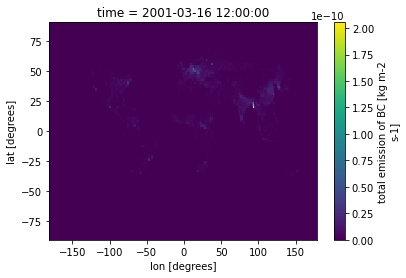

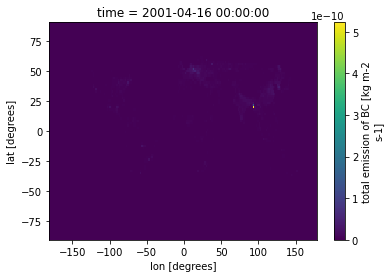

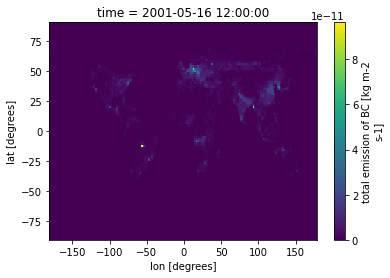

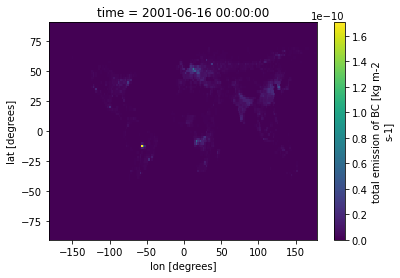

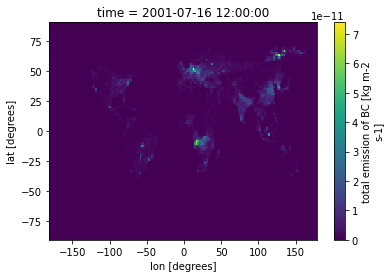

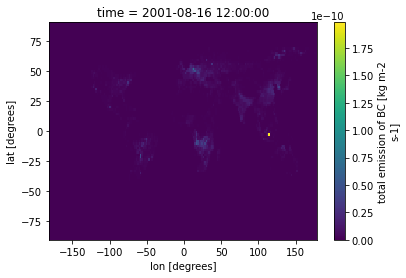

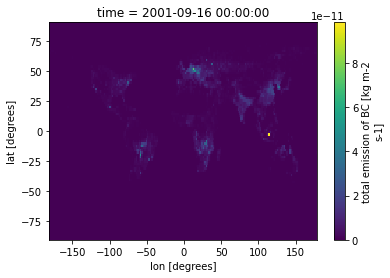

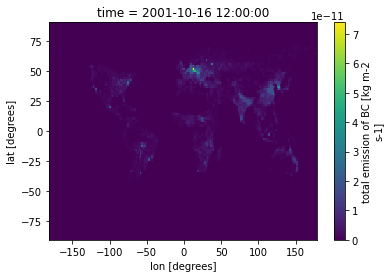

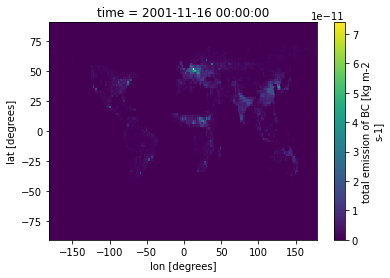

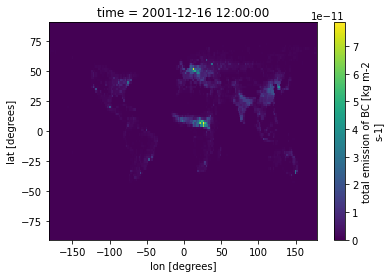

In [44]:
for t in SR6EA_ds['time']:
    fig, ax = plt.subplots()
    SR6EA_ds['emi_bc'].sel(time = t).plot()

/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask

Text(0.5, 1.0, 'SA')

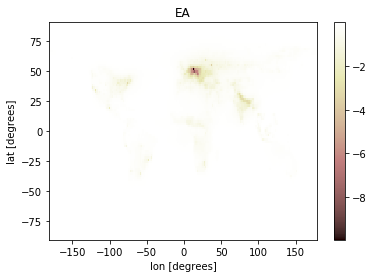

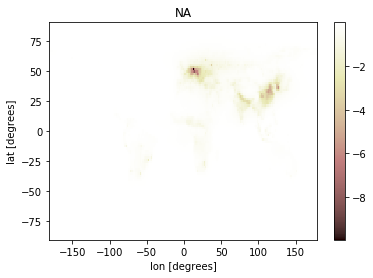

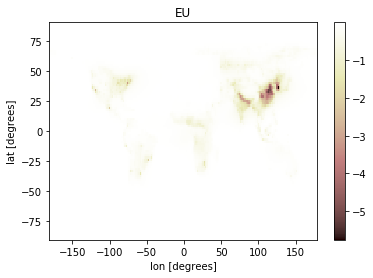

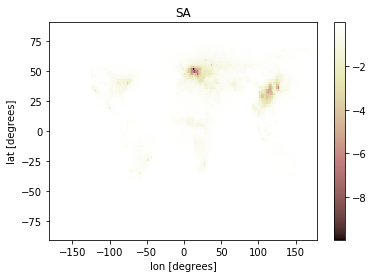

In [106]:
fig,ax = plt.subplots()
(SR6EA_ds['sconc_bcsr6ea'].mean(dim = 'time')-SR1_ds['sconc_bc'].mean(dim = 'time')).plot(cmap = 'pink')
plt.title('EA')

fig,ax = plt.subplots()
(SR6NA_ds['sconc_bcsr6na'].mean(dim = 'time')-SR1_ds['sconc_bc'].mean(dim = 'time')).plot(cmap = 'pink')
plt.title('NA')

fig,ax = plt.subplots()
(SR6EU_ds['sconc_bcsr6eu'].mean(dim = 'time')-SR1_ds['sconc_bc'].mean(dim = 'time')).plot(cmap = 'pink')
plt.title('EU')

fig,ax = plt.subplots()
(SR6SA_ds['sconc_bcsr6sa'].mean(dim = 'time')-SR1_ds['sconc_bc'].mean(dim = 'time')).plot(cmap = 'pink')
plt.title('SA')
